In [120]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import datasets
from sklearn.linear_model import LinearRegression

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [121]:
house = datasets.load_boston()
house

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [122]:
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [123]:
data = pd.DataFrame(house['data'], columns=house['feature_names'])

In [124]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [125]:
target = pd.DataFrame(house['target'], columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [126]:
data.shape, target.shape

((506, 13), (506, 1))

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [128]:
df = pd.concat([data, target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [129]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [130]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],
    df['target'],
    test_size = 0.2,
    random_state= 42

)

In [132]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [134]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [135]:
y_predict = lr.predict(X_test)
y_predict[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [136]:
## 회귀의 정확도를 나타내는 평가지표는 MAX, MSE(*), RMSE, R2-score
## 분류의 accuracy와 유사한 것은 R2_score
r2_score(y_test, y_predict)

0.6687594935356294

In [137]:
mse = mean_squared_error(y_test, y_predict) ## test데이터의 MSE
mse

24.29111947497371

In [138]:
y_predict2 = lr.predict(X_train)

In [139]:
r2_score(y_train, y_predict2) ## train 데이터

0.7508856358979673

In [140]:
mse2 = mean_squared_error(y_train, y_predict2) ## test데이터의 MSE
mse2

21.641412753226312

In [141]:
rmse1 = np.sqrt(mse) # test
rmse2 = np.sqrt(mse2) #train
print('train>>', rmse2, ',  test>>', rmse1)

train>> 4.6520331848801675 ,  test>> 4.928602182665355


In [142]:
## tradeoff 관계 => 
## 

In [143]:
lr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [144]:
lr.intercept_

30.24675099392408

In [145]:
## 상관관계를 고려하여 몇 개의 컬럼을 선정후, 전체컬럼을 넣었을 때와 비교해보세요.!

In [146]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [147]:
lr.predict([[0.01,15,1,0,0,0.59,25,10,0,1,10,5,100]])

array([-41.24008682])

In [148]:
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Feature: 0   Score: -0.11306
Feature: 1   Score: 0.03011
Feature: 2   Score: 0.04038
Feature: 3   Score: 2.78444
Feature: 4   Score: -17.20263
Feature: 5   Score: 4.43884
Feature: 6   Score: -0.00630
Feature: 7   Score: -1.44787
Feature: 8   Score: 0.26243
Feature: 9   Score: -0.01065
Feature: 10   Score: -0.91546
Feature: 11   Score: 0.01235
Feature: 12   Score: -0.50857


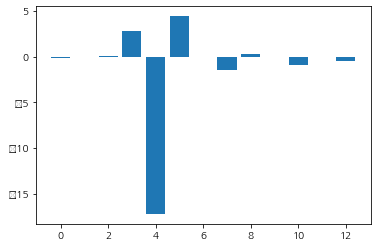

In [149]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d   Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [150]:
house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [151]:
data_columns = df[['RM', 'CHAS', 'NOX', 'DIS']]


In [152]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    data_columns,
    df['target'],
    test_size = 0.2,
    random_state= 42
)

In [153]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((404, 4), (102, 4), (404,), (102,))

In [154]:
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)

LinearRegression()

In [155]:
y_predict1 = lr1.predict(X_test1)
y_predict1[:3]

array([25.37717918, 34.58512921, 19.48654816])

In [156]:
## 회귀의 정확도를 나타내는 평가지표는 MAX, MSE(*), RMSE, R2-score
## 분류의 accuracy와 유사한 것은 R2_score
r2_score(y_test1, y_predict1)

0.461000918188034

In [157]:
mse3 = mean_squared_error(y_test1, y_predict1) ## test데이터의 MSE
mse3

39.526841789211886

In [158]:
y_predict4 = lr1.predict(X_train1)

In [159]:
mse4 = mean_squared_error(y_train1, y_predict4) ## test데이터의 MSE
mse4

36.19391085677683

In [160]:
rmse3 = np.sqrt(mse3) # test
rmse4 = np.sqrt(mse3) #train
print('train>>', rmse2, ',  test>>', rmse1)

train>> 4.6520331848801675 ,  test>> 4.928602182665355


In [161]:
y_predict3 = lr1.predict(X_train1)

Feature: 0   Score: 8.05702
Feature: 1   Score: 5.56487
Feature: 2   Score: -29.64412
Feature: 3   Score: -0.68469


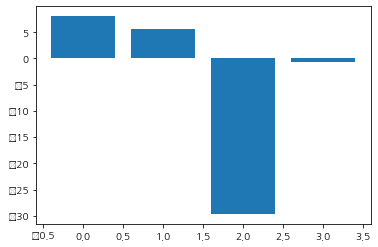

In [162]:
importance1 = lr1.coef_
# summarize feature importance
for i,v in enumerate(importance1):
	print('Feature: %0d   Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()